# Part I: To be completed by hand:

### Q1: When a student performs poorly on a quiz, the student sometimes is convinced that their score is an anomaly and that they will do much better on the next quiz.
### The following data show the quiz scores (out of 20 points) for 4 students in STA301 in Spring2024. X= quiz1 score and Y=quiz 2 score.
### (8, 10), (12, 12), (8, 15), (11, 10) 

#### a) Write the residual sum of squares (RSS) function and use it to derive the least squares estimates of the regression line. 

#### b) Give an estimate of the pure error sum of squares. What are the degrees of freedom for the pure error?

#### c) Give an estimate of the common variance, 𝜎2. 

#### d) Complete the following table for the calculations of expected residuals under Normality 

#### e) Use a software to calculate the correlation coefficient between e and 𝒆̂  and use it to make a conclusion on whether the normality assumption is possibly satisfied for this small sample of instances

# Part II: To be completed with the help of software: 
The dataset “dubai_properties” provides a detailed snapshot of rental property listings across major 
cities in the United Arab Emirates, including Abu Dhabi, Dubai, Sharjah, Ajman, Ras Al Khaimah, 
Umm Al Quwain, and Al Ain. Gathered from bayut.com, it includes various attributes such as 
property type, size, rent, and location details, making it a valuable resource for data-driven insights 
into the UAE rental market. Ideal for data analysts, researchers, and real estate professionals, this 
dataset allows for comprehensive analysis of trends, pricing, and market dynamics in the UAE's 
diverse rental landscape.

### a) Is the study an example of experimental design, observational study or mixed? 

Randomly sample 5000 entries from the data set (without replacement) and use the resulting 
data set to answer the below. 

In [4]:
import pandas as pd

# Load dataset
df = pd.read_csv("dubai_properties.csv")  # use the full path if running outside notebook

# Sample 5000 entries without replacement
df_sample = df.sample(n=5000, replace=False, random_state=42).reset_index(drop=True)
df_sample.head()

,Address,Rent,Beds,Baths,Type,Area_in_sqft,Rent_per_sqft,Rent_category,Frequency,Furnishing,Purpose,Posted_date,Age_of_listing_in_days,Location,City,Latitude,Longitude
0,"Muroor Road, Al Muroor, Abu Dhabi",63000,1,1,Apartment,940,67.021277,Low,Yearly,Unfurnished,For Rent,2024-04-06,15,Al Muroor,Abu Dhabi,24.476252,54.372675
1,"Al Rawda 3, Al Rawda, Ajman",75000,6,8,Villa,5000,15.000000,Medium,Yearly,Unfurnished,For Rent,2024-04-07,14,Al Rawda,Ajman,25.385444,55.441620
2,"Tower A, DAMAC Towers by Paramount Hotels and ...",220000,3,2,Apartment,1935,113.695090,High,Yearly,Furnished,For Rent,2024-02-13,68,Business Bay,Dubai,25.189427,55.264819
3,"Chorisia I, Al Barari, Dubai",1125000,5,2,Villa,4758,236.443884,High,Yearly,Unfurnished,For Rent,2024-02-26,55,Al Barari,Dubai,25.118865,55.320968
4,"Oxford Residence 2, JVC District 10, Jumeirah ...",52000,0,2,Apartment,388,134.020619,Low,Yearly,Unfurnished,For Rent,2024-02-08,73,Jumeirah Village Circle (JVC),Dubai,25.055945,55.207465


## Probability calculations: 

### b) Construct the frequency table of the “Furnishing” column and use the table to answer the following questions:


#### i. Calculate the percentage of “furnished” properties.

#### ii. Suppose you survey 50 renting properties across major cities in the UAE, what is the probability that 35 of them are furnished? 

### c) Construct a frequency table of the “Rent_category” columns and use the results to answer  the following questions:

#### i. Calculate the percentages of the three values “High”, “Medium” and “Low”. 


#### ii. Suppose you survey 50 properties across major cities in the UAE, what is the probability 15 are Low rent, 10 are Medium rent and the rest are of High rent? 

### d) Suppose the average number of bedrooms for the rental properties in Dubai is 2. Suppose you survey some rental properties in Dubai, what is the probability that you find at most 1 of them with 2 bedrooms. 

### e) Construct box plot chart of “Age_of_listing_in_days” by the variable “Furnishing”. Discuss the patterns you see in the plots and compare the central values, variability and skewness across the two Furnishing categories 

### f) Give the summary statistics of the “Age_of_listing_in_days” by the variable “Furnishing”?

#### i. Compare the mean values of the age of listing for furnished and unfurnished properties. Which type of properties has longer listing. 

#### ii. Calculate the coefficient of variation of the age of listing for the two furnishing categories and discuss the results.


#### iii. Construct the 95% confidence interval for the ratio of variances of the age of listing for furnished and unfurnished properties. What do you conclude? 

### g) Construct the Normal probability plot (Q-Q plot) for the rent? Does the plot indicate that the rent is normally distributed. 

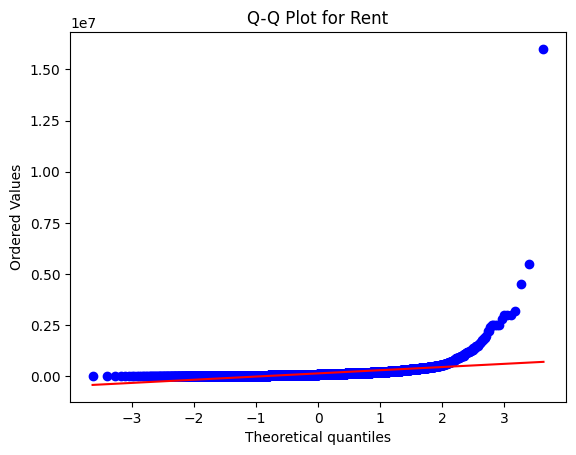

In [5]:
import scipy.stats as stats
import matplotlib.pyplot as plt

# Q-Q plot
stats.probplot(df_sample["Rent"].dropna(), dist="norm", plot=plt)
plt.title("Q-Q Plot for Rent")
plt.show()


### h) Construct the correlation coefficient matrix for the features: rent, beds, baths, area_in_sqft, rent_per_sqft and age of listing . Comment on the strength of the correlations? Which pair of features is the most correlated? Which pair of features is the least correlated? Hint: consider depicting the correlations in a heatmap.

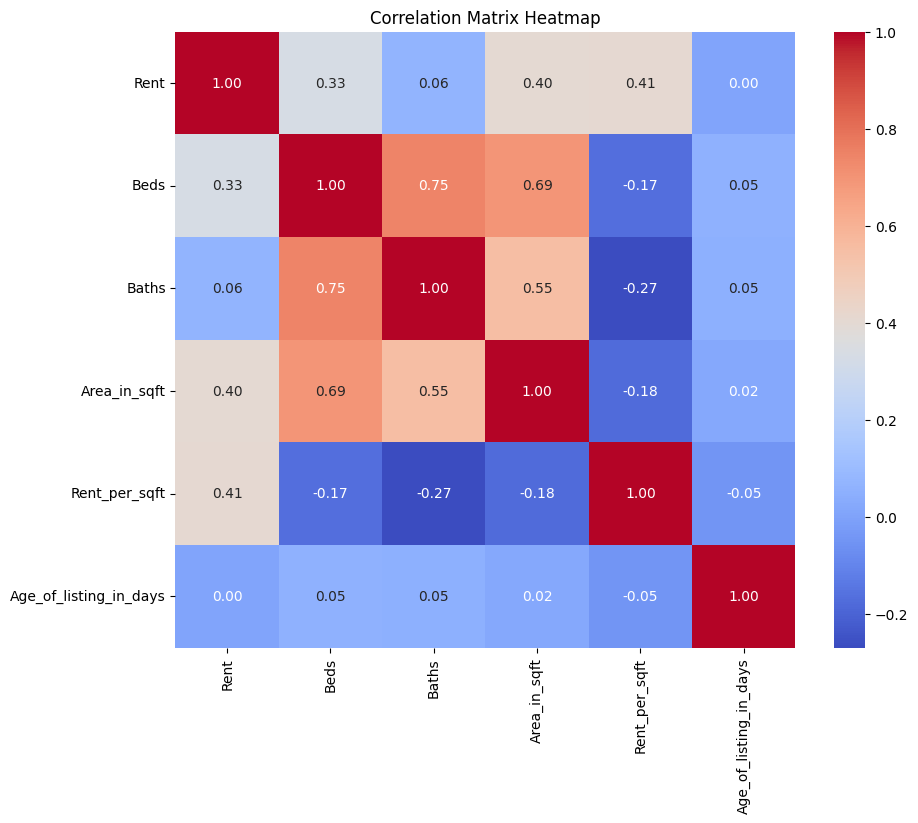

In [6]:
import seaborn as sns

# Select relevant features
features = ["Rent", "Beds", "Baths", "Area_in_sqft", "Rent_per_sqft", "Age_of_listing_in_days"]
corr_matrix = df_sample[features].corr()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix Heatmap")
plt.show()

### i) Construct a two-way classification table for the variables “rent_category” and “city”. Use the table to test if the two variables are independent? State the hypotheses and conclusions clearly and discuss any pattern you find in the table. Use α=0.05. 

In [10]:
from scipy.stats import chi2_contingency

ct_city = pd.crosstab(df_sample['Rent_category'], df_sample['City'])
chi2, p, dof, expected = chi2_contingency(ct_city)

print("Chi-Square Test (Rent Category vs City)")
print("Chi2 Statistic:", chi2)
print("p-value:", p)
if p < 0.05:
    print("Reject null hypothesis: Variables are dependent.")
else:
    print("Fail to reject null hypothesis: Variables are independent.")

Chi-Square Test (Rent Category vs City)
Chi2 Statistic: 1414.054443231219
p-value: 1.2973474891053002e-295
Reject null hypothesis: Variables are dependent.


### j) Construct a two-way classification table for the variables “rent_category” and “Furnishing”. Test for independence? State the hypotheses and conclusions clearly and discuss any pattern you find in the table. Which rent category is more likely to be unfurnished. Use α=0.05.

In [11]:
ct_furnishing = pd.crosstab(df_sample['Rent_category'], df_sample['Furnishing'])
chi2, p, dof, expected = chi2_contingency(ct_furnishing)

print("Chi-Square Test (Rent Category vs Furnishing)")
print("Chi2 Statistic:", chi2)
print("p-value:", p)
if p < 0.05:
    print("Reject null hypothesis: Variables are dependent.")
else:
    print("Fail to reject null hypothesis: Variables are independent.")

# Determine which category is more likely to be unfurnished
print(ct_furnishing)


Chi-Square Test (Rent Category vs Furnishing)
Chi2 Statistic: 207.205886358242
p-value: 1.0134759992877909e-45
Reject null hypothesis: Variables are dependent.
Furnishing     Furnished  Unfurnished
Rent_category                        
High                 526         1157
Low                  174         1451
Medium               396         1296


---

## Naïve Bayes

### k) Split your sampled data set into 70% training data set and 30% testing data set.

### l) Apply Naïve Bayes classifier to the training data set in order to develop a model that predicts the target variable “Furnishing” using the features: rent, beds, baths, type, area_in_sqft, rent category and age of listing 

### m) Apply your model in part l) to the testing data. Construct the confusion matrix and calculate  the misclassification rate.

### n) Does the data suffer from imbalanced classification of the target variable? If so, how does this imbalance affect the accuracy of your model. 

---

## Simple Regression

### o) Construct a scatter plot of the variable “Y=rent” against “X= area_in_sqft” using the training dataset. Comment on the type of relationship between the two variables? Are there outliers? 

### p) Fit a simple linear regression function relating Y to X. 

### q) Explain what does the value of R-sq represent and use it to obtain the  correlation coefficient between Y and X? Is the correlation significant from zero? 

### r) Explain what the lack of fit test tells you about the fitted equation in part p). Conduct the test and state your conclusions clearly.

### s) Evaluate the appropriateness of the regression equation and use residual analyses to check model assumptions. Are all model assumptions satisfied? 

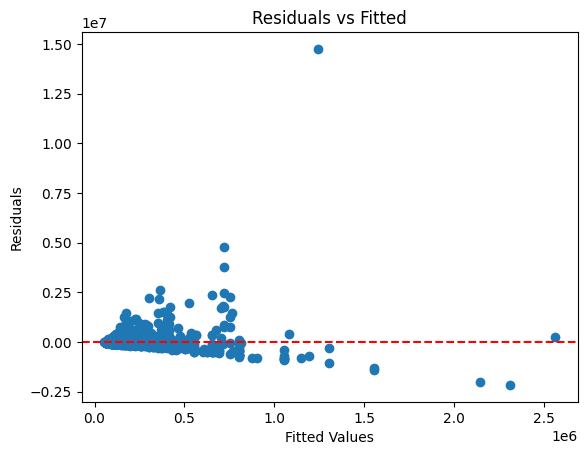

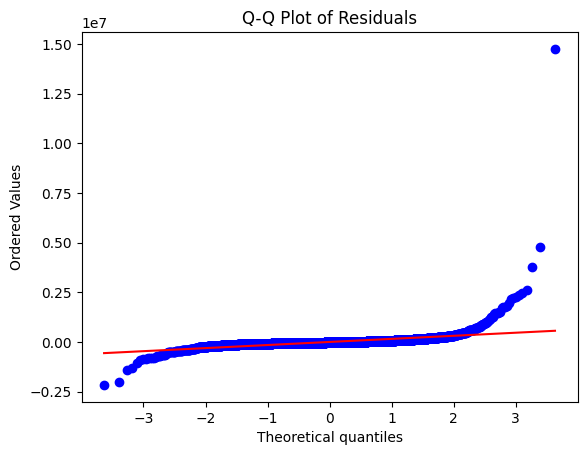

In [14]:
import statsmodels.api as sm

# Fit simple linear regression
X = df_sample['Area_in_sqft']
y = df_sample['Rent']
X_const = sm.add_constant(X)
model = sm.OLS(y, X_const).fit()

# Residual plot
residuals = model.resid
fitted_vals = model.fittedvalues

plt.scatter(fitted_vals, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Residuals vs Fitted")
plt.show()

# Q-Q plot of residuals
stats.probplot(residuals, dist="norm", plot=plt)
plt.title("Q-Q Plot of Residuals")
plt.show()


### t) Apply one of the remedies discussed in the class to improve the fitted equation. 

In [24]:
import numpy as np

#get rid of neg and or 0 vals:
df_filtered = df_sample[(df_sample['Rent'] > 0) & (df_sample['Area_in_sqft'] > 0)].copy()
df_filtered['log_rent'] = np.log(df_filtered['Rent'])
df_filtered['log_area'] = np.log(df_filtered['Area_in_sqft'])

df_sample = df_filtered
# Apply log transformation
df_sample['log_rent'] = np.log(df_sample['Rent'])
df_sample['log_area'] = np.log(df_sample['Area_in_sqft'])

# Fit new model
X_log = sm.add_constant(df_sample['log_area'])
model_log = sm.OLS(df_sample['log_rent'], X_log).fit()

print(model_log.summary())

                            OLS Regression Results                            
Dep. Variable:               log_rent   R-squared:                       0.347
Model:                            OLS   Adj. R-squared:                  0.347
Method:                 Least Squares   F-statistic:                     2661.
Date:                Sun, 13 Apr 2025   Prob (F-statistic):               0.00
Time:                        21:30:10   Log-Likelihood:                -5185.2
No. Observations:                4999   AIC:                         1.037e+04
Df Residuals:                    4997   BIC:                         1.039e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.8007      0.092     74.186      0.0

### u) Use the improved regression equation in part r) to find the 95% prediction and confidence intervals for X=350 sqft, and X=2200 sqft. Which prediction seems to be most accurate? Why? 

In [25]:
# Prepare input data
X_pred = pd.DataFrame({'Area_in_sqft': [350, 2200]})
X_pred_log = pd.DataFrame({'log_area': np.log(X_pred['Area_in_sqft'])})
X_pred_log = sm.add_constant(X_pred_log)

# Predict with confidence and prediction intervals
pred = model_log.get_prediction(X_pred_log)
pred_summary = pred.summary_frame(alpha=0.05)
print(pred_summary)

# Most accurate? Smaller interval width means higher precision
interval_widths = pred_summary['obs_ci_upper'] - pred_summary['obs_ci_lower']
print("More accurate prediction at:", X_pred['Area_in_sqft'][interval_widths.idxmin()])


        mean   mean_se  mean_ci_lower  mean_ci_upper  obs_ci_lower  \
0  10.591137  0.020141      10.551651      10.630622      9.251871   
1  11.780629  0.011058      11.758951      11.802308     10.441771   

   obs_ci_upper  
0     11.930402  
1     13.119488  
More accurate prediction at: 2200


### v) Use the regression equation in part p) to predict the Y for the values of X in the testing dataset. Calculate the sum of squared prediction error (SSE) and compare it the SSE obtained in the model fit in part p)?

In [26]:
from sklearn.model_selection import train_test_split

# Split into train and test
train, test = train_test_split(df_sample, test_size=0.3, random_state=42)

# Fit model on train
X_train = sm.add_constant(train['log_area'])
y_train = np.log(train['Rent'])
model_train = sm.OLS(y_train, X_train).fit()

# Predict on test
X_test = sm.add_constant(np.log(test['Area_in_sqft']))
y_test_actual = np.log(test['Rent'])
y_test_pred = model_train.predict(X_test)

# Calculate SSE
sse = np.sum((y_test_actual - y_test_pred) ** 2)
print("Sum of Squared Errors (SSE) on Test Set:", sse)


Sum of Squared Errors (SSE) on Test Set: 703.3613972145038
